<a href="https://colab.research.google.com/github/Kedar154/AI-Driven-Stock-Market-Intelligence/blob/main/stock_pred_ARIMA(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis')

Skipping, found downloaded files in "./microsoft-stock-time-series-analysis" (use force=True to force download)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import signal
from scipy.stats import boxcox

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
data = pd.read_csv('/content/microsoft-stock-time-series-analysis/Microsoft_Stock.csv')

In [6]:
data

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [7]:
def graph(df, y, x_label, y_label, title):
  plt.figure(figsize=(10, 4))
  plt.plot(df.index, df[y])
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()

In [8]:
stock = pd.DataFrame({})
stock['price'] = data['Close']
stock['date'] = pd.to_datetime(data['Date']).dt.date #to only keep date

In [9]:
stock =stock.set_index('date')

In [10]:
stock

,price
date,
2015-04-01,40.72
2015-04-02,40.29
2015-04-06,41.55
2015-04-07,41.53
2015-04-08,41.42
...,...
2021-03-25,232.34
2021-03-26,236.48
2021-03-29,235.24


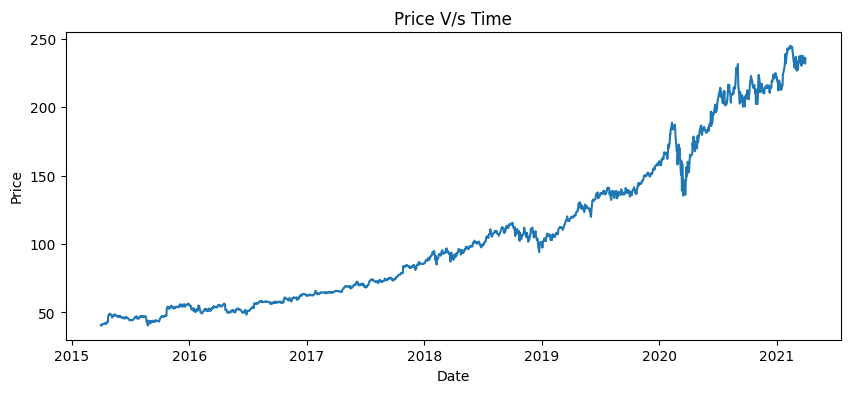

In [11]:
graph(stock, 'price', 'Date', 'Price',  'Price V/s Time')

# BOXCOX TRANSFORM


In [12]:
stock['prices_bc'], lam = boxcox(stock['price'])


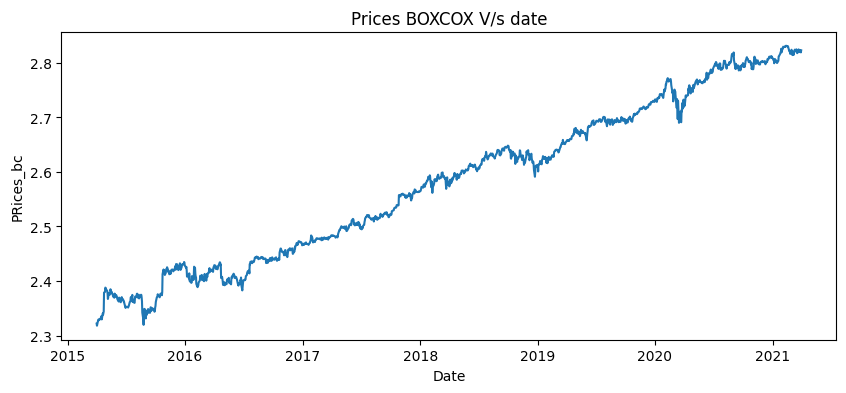

In [13]:
graph(stock, 'prices_bc', 'Date', 'PRices_bc', 'Prices BOXCOX V/s date')

# Seasonality

In [14]:
from scipy.signal import periodogram

In [15]:
stock

,price,prices_bc
date,,
2015-04-01,40.72,2.321878
2015-04-02,40.29,2.318052
2015-04-06,41.55,2.329121
2015-04-07,41.53,2.328949
2015-04-08,41.42,2.327999
...,...,...
2021-03-25,232.34,2.819700
2021-03-26,236.48,2.823624
2021-03-29,235.24,2.822458


In [16]:
freq, pow = periodogram( stock.prices_bc, scaling = 'density', detrend = 'constant')

In [17]:
periods = np.array([])
power = np.array([])
mask = freq != 0
periods = np.append(periods, 1/freq[mask])
power = np.append(power, pow[mask])

In [18]:
power

array([2.00348267e+01, 4.69416532e+00, 2.02046956e+00, 1.02484862e+00,
       9.16277245e-01, 4.98862965e-01, 4.09856263e-01, 2.62370450e-01,
       9.17062470e-02, 1.91078937e-01, 1.31051631e-01, 1.21802043e-01,
       8.20120094e-02, 4.93765773e-02, 1.06297439e-01, 1.47406665e-01,
       9.63210066e-02, 5.15770327e-02, 2.22104144e-02, 2.44576251e-02,
       3.53124387e-02, 5.56164657e-02, 2.85343542e-02, 2.71090007e-02,
       2.01031726e-02, 1.97957664e-02, 3.51239344e-02, 3.84170741e-02,
       4.13697206e-02, 1.95897712e-02, 1.45510462e-02, 2.28414259e-02,
       1.92242129e-02, 3.16633217e-02, 1.29865979e-02, 9.91175668e-03,
       5.62976913e-03, 1.11218467e-02, 2.04549920e-02, 1.28802980e-02,
       1.51938329e-02, 5.12955246e-03, 9.18321548e-03, 1.79486524e-02,
       1.99519412e-02, 1.15161093e-02, 7.82785018e-03, 1.29256306e-02,
       1.24805750e-02, 1.27708813e-02, 1.38157383e-02, 7.09294184e-03,
       5.89415111e-03, 9.04051030e-03, 1.12797208e-02, 9.01007031e-03,
      

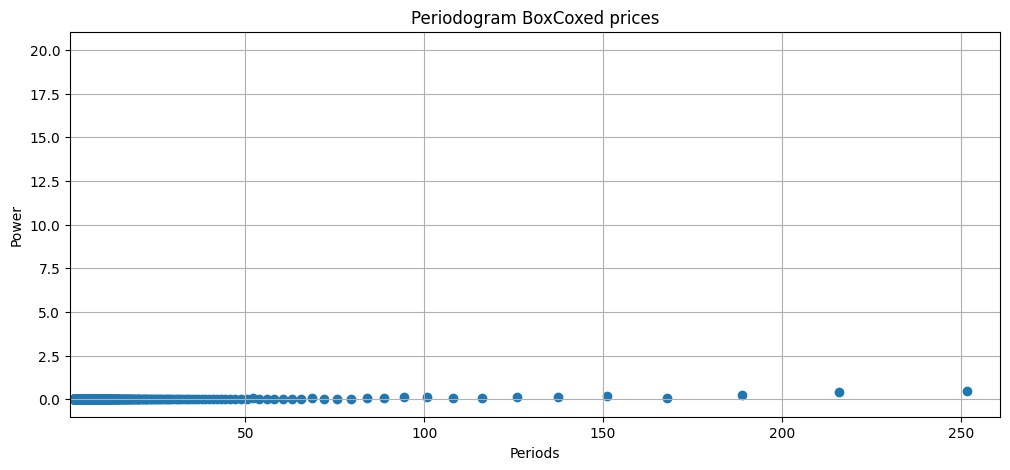

In [19]:
plt.figure(figsize = (12,5))
plt.scatter(periods, power)
plt.xlim(1, 261) # realistic trading cycles (bussiness days in a year)
plt.xlabel('Periods')
plt.ylabel('Power')
plt.title('Periodogram BoxCoxed prices')
plt.grid(True)
plt.show()

# Differencing

In [20]:
use_d = False

In [21]:
if(use_d):
  stock['price_bcd1'] = stock['prices_bc'].diff(1)
  stock['price_bcd2'] = stock['prices_bc'].diff(2)
  stock['price_bcd3'] = stock['prices_bc'].diff(3)
  stock['price_bcd4'] = stock['prices_bc'].diff(4)
  stock['price_bcd5'] = stock['prices_bc'].diff(5)

In [23]:
#graph(stock,'price_bcd1', 'date', 'price_bcd1', 'price_bcd1' )

In [24]:
#graph(stock,'price_bcd2', 'date', 'price_bcd1', 'price_bcd1' )

In [25]:
#graph(stock,'price_bcd3', 'date', 'price_bcd1', 'price_bcd1' )

In [26]:
#graph(stock,'price_bcd4', 'date', 'price_bcd1', 'price_bcd1' )

In [27]:
#graph(stock,'price_bcd5', 'date', 'price_bcd1', 'price_bcd1' )

log returns

In [28]:
stock['logret'] = np.log( stock['price']).diff()
#stock = stock.dropna(subset = ['logret'])

In [29]:
stock

,price,prices_bc,logret
date,,,
2015-04-01,40.72,2.321878,NaN
2015-04-02,40.29,2.318052,-0.010616
2015-04-06,41.55,2.329121,0.030794
2015-04-07,41.53,2.328949,-0.000481
2015-04-08,41.42,2.327999,-0.002652
...,...,...,...
2021-03-25,232.34,2.819700,-0.013339
2021-03-26,236.48,2.823624,0.017662
2021-03-29,235.24,2.822458,-0.005257


In [30]:
stock.head()

,price,prices_bc,logret
date,,,
2015-04-01,40.72,2.321878,NaN
2015-04-02,40.29,2.318052,-0.010616
2015-04-06,41.55,2.329121,0.030794
2015-04-07,41.53,2.328949,-0.000481
2015-04-08,41.42,2.327999,-0.002652


# Auto Arima

In [31]:
pip install pmdarima

In [32]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split #splitting time series

In [33]:
tr, te = train_test_split(stock, train_size=0.8)
tr, val = train_test_split(stock, train_size=0.8)

In [34]:
tr

,price,prices_bc,logret
date,,,
2015-04-01,40.72,2.321878,NaN
2015-04-02,40.29,2.318052,-0.010616
2015-04-06,41.55,2.329121,0.030794
2015-04-07,41.53,2.328949,-0.000481
2015-04-08,41.42,2.327999,-0.002652
...,...,...,...
2020-01-10,161.34,2.734256,-0.004638
2020-01-13,163.28,2.737194,0.011953
2020-01-14,162.13,2.735458,-0.007068


In [61]:
model_logret = pm.auto_arima(tr.logret[1:],
                      seasonal = True, # Turn off seasonality as recommended for stock data
                      m = 5,
                      d = None,
                      test = 'adf',
                      start_p = 0,
                      start_q = 0,
                      max_p = 5,       # Reduced max_p as suggested
                      max_q = 5,       # Reduced max_q as suggested
                      stepwise=True,
                      suppress_warnings=True,
                      error_action="ignore",
                      n_jobs=-1        # Enable parallel processing
                      )

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


In [62]:
def log_rets_to_price(last_price, log_return_predictions):
    """
    Converts a sequence of predicted log returns back into absolute price levels.

    Parameters:
    last_price (float): The actual closing price of the day before the forecast starts.
    log_return_predictions (array-like): The output from your AutoARIMA model.

    Returns:
    pd.Series: A series of predicted prices.
    """
    # 1. Calculate the cumulative sum of the log returns
    # This represents the total growth over time
    cumulative_log_returns = np.cumsum(log_return_predictions)

    # 2. Use the exponential function to get the growth factor
    # and multiply by the starting price
    predicted_prices = last_price * np.exp(cumulative_log_returns)

    return predicted_prices

In [74]:
forecast = model_logret.predict(n_periods=len(val))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [75]:
forecasted_price = log_rets_to_price(tr['price'][-1], forecast)

/tmp/ipython-input-1989107923.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasted_price = log_rets_to_price(tr['price'][-1], forecast)


In [76]:
forecasted_price

,0
1207,166.087450
1208,165.971135
1209,166.246021
1210,166.384512
1211,166.404692
...,...
1505,233.743872
1506,234.013989
1507,234.284418
1508,234.555159


In [77]:
forecasted_price.index = val.index

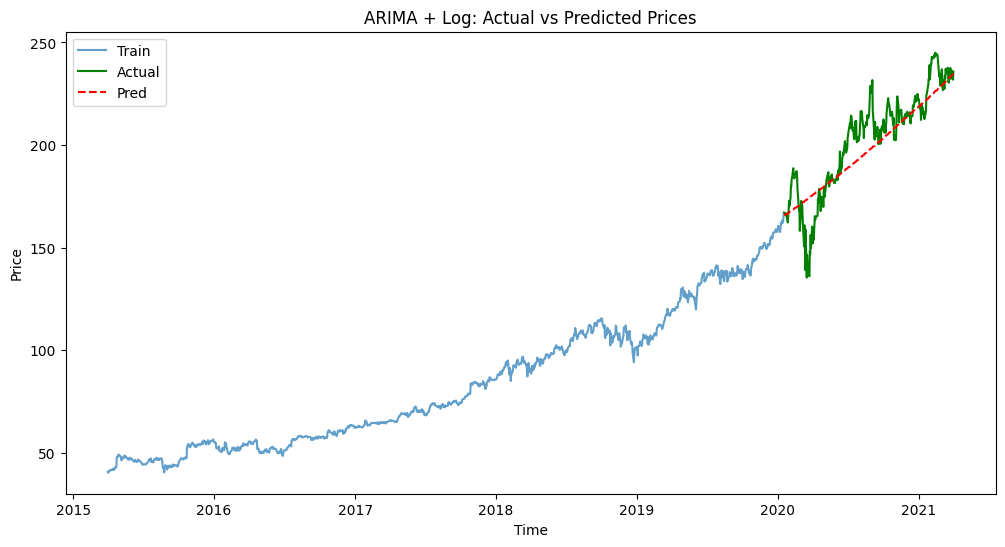

In [78]:
plt.figure(figsize=(12,6))

plt.plot(tr.price, label="Train", alpha=0.7)
plt.plot(val.price, label="Actual", color="green")
plt.plot(forecasted_price, label="Pred", linestyle="--", color='red')

plt.legend()
plt.title("ARIMA + Log: Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()